# Estymatory największej wiarygodności

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Przykład 
Program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [8]:
# Parametry rozkładu jednostajnego
a, b = -2, 4  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1, 1

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

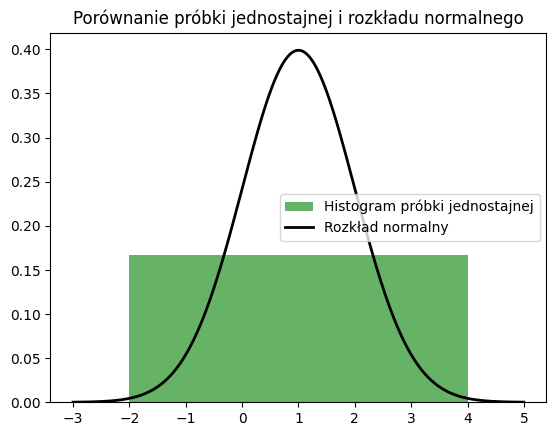

In [10]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny')

# Dodanie legendy i tytułu
plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego')
plt.show()

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

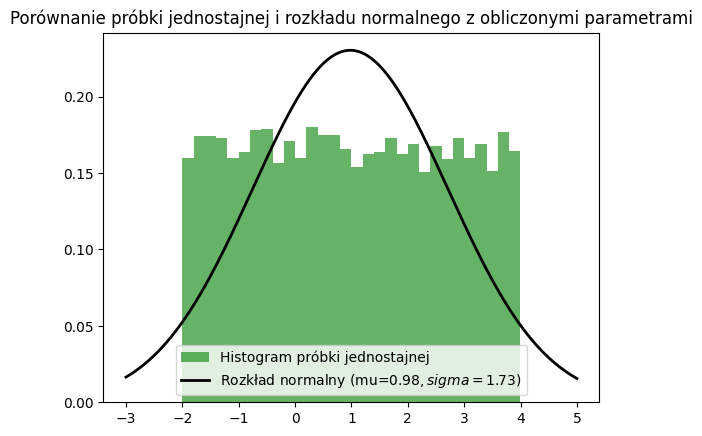

In [19]:


uniform_sample = np.random.uniform(a, b, N)


mu_sample = np.mean(uniform_sample)
sigma_sample = np.std(uniform_sample)


t = np.linspace(-3, 5, 1000)

plt.hist(uniform_sample, bins=30, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')


plt.plot(t, stats.norm.pdf(t, mu_sample, sigma_sample), 'k-', lw=2, label=f'Rozkład normalny (mu={mu_sample:.2f}$, sigma={sigma_sample:.2f}$)')


plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego z obliczonymi parametrami')
plt.show()


# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

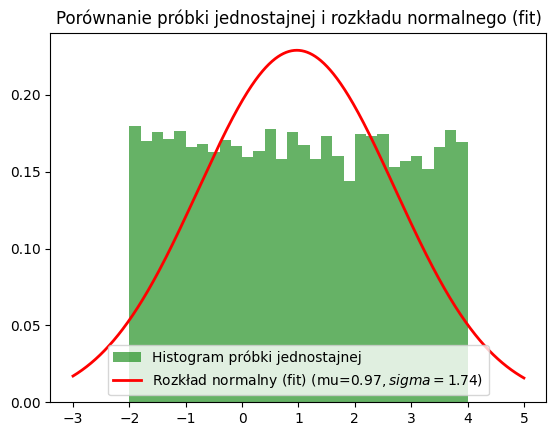

In [18]:
uniform_sample_2 = np.random.uniform(a, b, N)


mu_fit, sigma_fit = stats.norm.fit(uniform_sample_2)

t = np.linspace(-3, 5, 1000)


plt.hist(uniform_sample_2, bins=30, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

plt.plot(t, stats.norm.pdf(t, mu_fit, sigma_fit), 'r-', lw=2, label=f'Rozkład normalny (fit) (mu={mu_fit:.2f}$, sigma={sigma_fit:.2f}$)')


plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego (fit)')
plt.show()

# Zadanie 3

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [22]:
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [23]:

def log_likelihood(X, mu, sigma):
    return np.sum(np.log(Gpdf(X, mu, sigma)))

mu_test, sigma_test = 0, 1  
sample_size = 1000  
sample = np.random.normal(mu_test, sigma_test, sample_size)

log_likelihood_value = log_likelihood(sample, mu_test, sigma_test)
print(f"Wartość logarytmicznej funkcji wiarygodności dla mu={mu_test} i sigma={sigma_test}: {log_likelihood_value}")



Wartość logarytmicznej funkcji wiarygodności dla mu=0 i sigma=1: -1439.6939268256897


# Zadanie 4
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [ ]:

params_sets = [(mu1, sigma1), (mu2, sigma2), (mu3, sigma3)]


log_likelihood_values_corrected = {params: log_likelihood(uniform_sample_4, params[0], params[1]) for params in params_sets}

for params, value in log_likelihood_values_corrected.items():
    print(f"Parameters (mu={params[0]}, sigma={params[1]}): Log-likelihood value = {value}")


best_params_corrected = max(log_likelihood_values_corrected, key=log_likelihood_values_corrected.get)
print(f"\nThe highest log-likelihood value is for parameters (mu={best_params_corrected[0]}, sigma={best_params_corrected[1]}).")


# Przykład
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [6]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[ -1.01000000e+00  -7.52508635e-09]


# Zadanie 5
Zminimalizuj funkcję wiarygodności korzystając z optimize (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

# Zadanie 6
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

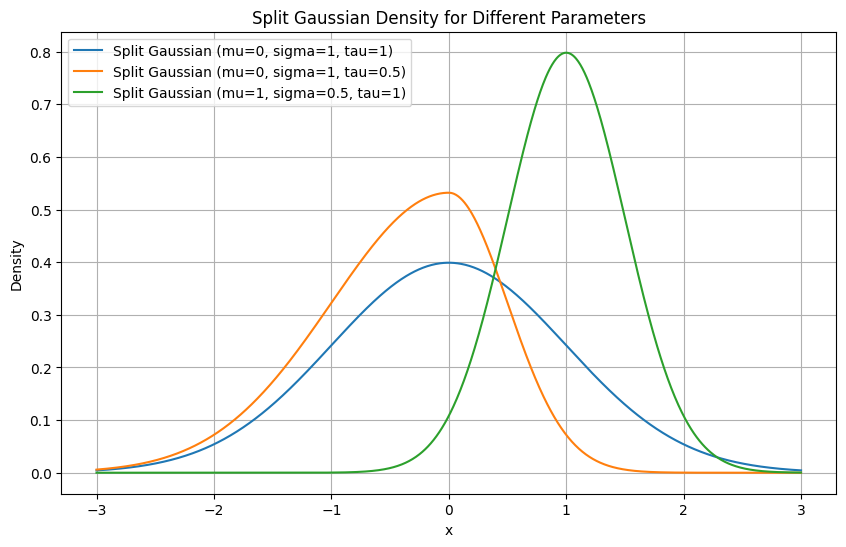

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def split_gaussian(x, mu, sigma, tau):
    c = np.sqrt(2 / np.pi) * (1 / sigma) * (1 / (1 + tau))
    if x <= mu:
        return c * np.exp(- (x - mu)**2 / (2 * sigma**2))
    else:
        return c * np.exp(- (x - mu)**2 / (2 * (sigma * tau)**2))


x_values = np.linspace(-3, 3, 1000)


params = [
    (0, 1, 1),
    (0, 1, 0.5),
    (1, 0.5, 1)
]

plt.figure(figsize=(10, 6))
for param in params:
    y_values = [split_gaussian(x, *param) for x in x_values]
    plt.plot(x_values, y_values, label=f'Split Gaussian (mu={param[0]}, sigma={param[1]}, tau={param[2]})')
    
plt.legend()
plt.title('Split Gaussian Density for Different Parameters')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Zadanie 7

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [25]:
def log_likelihood_split_normal(X, mu, sigma, tau):

    return np.sum(np.log([split_gaussian(x, mu, sigma, tau) for x in X]))


sample_size = 1000
X_sample = np.random.uniform(-3, 3, sample_size) 

log_likelihood_value = log_likelihood_split_normal(X_sample, 0, 1, 1)
print(f"Wartość logarytmicznej funkcji wiarygodności dla przykładowej próbki: {log_likelihood_value}")


Wartość logarytmicznej funkcji wiarygodności dla przykładowej próbki: -2408.8341221167802


# Zadanie 8
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [2]:
import numpy as np
from scipy.optimize import minimize


# Definicja funkcji split_gaussian zgodnie z przesłanym kodem
def split_gaussian(x, mu, sigma, tau):
    c = np.sqrt(2 / np.pi) * (1 / sigma) * (1 / (1 + tau))
    if x <= mu:
        return c * np.exp(-((x - mu) ** 2) / (2 * sigma**2))
    else:
        return c * np.exp(-((x - mu) ** 2) / (2 * (sigma * tau) ** 2))


# Definicja funkcji log_likelihood_split_normal
def log_likelihood_split_normal(params, X):
    mu, sigma, tau = params
    # Sumujemy logarytm z funkcji split_gaussian dla każdego x w próbce X
    return -np.sum(np.log([split_gaussian(x, mu, sigma, tau) for x in X]))


# Przykładowa próbka danych
sample_size = 1000
X_sample = np.random.uniform(-3, 3, sample_size)

# Początkowe zgadywane wartości parametrów
initial_guess = [0, 1, 1]

# Ustawiamy granice dla parametrów, zakładając że sigma i tau muszą być dodatnie
bounds = [(-np.inf, np.inf), (0, np.inf), (0, np.inf)]

# Minimalizacja funkcji wiarygodności
result = minimize(
    log_likelihood_split_normal, initial_guess, args=(X_sample,), bounds=bounds
)

# Wyniki
optimized_parameters = result.x
optimized_log_likelihood = -result.fun

print(
    "Zoptymalizowane parametry: mu = {:.2f}, sigma = {:.2f}, tau = {:.2f}".format(
        *optimized_parameters
    )
)
print(
    "Wartość logarytmicznej funkcji wiarygodności dla zoptymalizowanych parametrów: {:.2f}".format(
        optimized_log_likelihood
    )
)

Zoptymalizowane parametry: mu = 1.28, sigma = 2.41, tau = 0.44
Wartość logarytmicznej funkcji wiarygodności dla zoptymalizowanych parametrów: -1974.35


/tmp/ipykernel_13680/3862502119.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  return c * np.exp(-((x - mu) ** 2) / (2 * (sigma * tau) ** 2))
/tmp/ipykernel_13680/3862502119.py:18: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log([split_gaussian(x, mu, sigma, tau) for x in X]))
/home/sit3kk/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


# Zadanie 9
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>california_housing.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [31]:
from sklearn import datasets
california_housing = datasets.fetch_california_housing()
data=california_housing.data[:,7]

In [32]:
from scipy.optimize import minimize


np.random.seed(0)
sample_data = np.random.lognormal(mean=10, sigma=0.5, size=1000)


mu_initial = np.mean(sample_data)
sigma_initial = np.std(sample_data)
tau_initial = np.std(sample_data)

def negative_log_likelihood_normal(params):
    mu, sigma = params
    return -np.sum(np.log(stats.norm.pdf(sample_data, mu, sigma)))

def negative_log_likelihood_split_normal(params):
    mu, sigma, tau = params
    return -log_likelihood_split_normal(sample_data, mu, sigma, tau)
result_normal = minimize(negative_log_likelihood_normal, [mu_initial, sigma_initial], method='L-BFGS-B')
mu_normal, sigma_normal = result_normal.x

result_split_normal = minimize(negative_log_likelihood_split_normal, [mu_initial, sigma_initial, tau_initial], method='L-BFGS-B')
mu_split_normal, sigma_split_normal, tau_split_normal = result_split_normal.x

print(f"Rozkład normalny: mu = {mu_normal}, sigma = {sigma_normal}")
print(f"Rozkład Split Normal: mu = {mu_split_normal}, sigma = {sigma_split_normal}, tau = {tau_split_normal}")
print(f"Logarytmiczna funkcja wiarygodności dla rozkładu normalnego: {-result_normal.fun}")
print(f"Logarytmiczna funkcja wiarygodności dla rozkładu Split Normal: {-result_split_normal.fun}")







Rozkład normalny: mu = 24333.75876120886, sigma = 12759.499633406529
Rozkład Split Normal: mu = -1513.175591403462, sigma = -34786.09566191612, tau = -55846.56069293718
Logarytmiczna funkcja wiarygodności dla rozkładu normalnego: -10872.969875651703
Logarytmiczna funkcja wiarygodności dla rozkładu Split Normal: -21613.109703819224


/tmp/ipykernel_22148/1549464187.py:3: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log([split_gaussian(x, mu, sigma, tau) for x in X]))
